In [3]:
import pandas as pd

# Wczytanie danych
training_data = pd.read_csv("Training.csv")
testing_data = pd.read_csv("Testing.csv")


In [4]:
# Usunięcie kolumn, które jednoznacznie identyfikują węzły w sieci
columns_to_drop = ['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Flow ID', 'Protocol', 'Timestamp']
training_data = training_data.drop(columns=columns_to_drop)
testing_data = testing_data.drop(columns=columns_to_drop)

# Usunięcie wierszy z wartościami nieskończoności i NaN
training_data = training_data.replace([float('inf'), -float('inf')], float('nan')).dropna()
testing_data = testing_data.replace([float('inf'), -float('inf')], float('nan')).dropna()

# One-hot encoding dla kolumny 'Label'
training_data = pd.get_dummies(training_data, columns=['Label'])
testing_data = pd.get_dummies(testing_data, columns=['Label'])


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train = training_data.drop(columns=[col for col in training_data.columns if 'Label_' in col])
y_train = training_data[[col for col in training_data.columns if 'Label_' in col]]
X_test = testing_data.drop(columns=[col for col in testing_data.columns if 'Label_' in col])
y_test = testing_data[[col for col in testing_data.columns if 'Label_' in col]]

rf_model_user_defined = RandomForestClassifier()
rf_model_user_defined.fit(X_train, y_train)

y_pred_user_defined = rf_model_user_defined.predict(X_test)

f1_scores_user_defined = f1_score(y_test, y_pred_user_defined, average=None)
mean_f1_score_user_defined = f1_score(y_test, y_pred_user_defined, average='macro')

f1_scores_user_defined, mean_f1_score_user_defined


(array([0.27272727, 0.81203008, 0.82783883, 0.99957282, 0.88195387,
        0.74235808]),
 0.7560801576238808)

In [7]:
category_f1_scores_user_defined = dict(zip(y_test.columns, f1_scores_user_defined))

category_f1_scores_user_defined, mean_f1_score_user_defined

({'Label_DataExfiltration': 0.27272727272727276,
  'Label_InitialCompromise': 0.81203007518797,
  'Label_LateralMovement': 0.8278388278388279,
  'Label_NormalTraffic': 0.9995728243581005,
  'Label_Pivoting': 0.8819538670284938,
  'Label_Reconnaissance': 0.74235807860262},
 0.7560801576238808)

In [8]:
from sklearn.model_selection import train_test_split

combined_data = pd.concat([training_data, testing_data], axis=0)
X_combined = combined_data.drop(columns=[col for col in combined_data.columns if 'Label_' in col])
y_combined = combined_data[[col for col in combined_data.columns if 'Label_' in col]]

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

rf_model_random = RandomForestClassifier()
rf_model_random.fit(X_train_random, y_train_random)

y_pred_random = rf_model_random.predict(X_test_random)

f1_scores_random = f1_score(y_test_random, y_pred_random, average=None)
mean_f1_score_random = f1_score(y_test_random, y_pred_random, average='macro')

f1_scores_random, mean_f1_score_random


(array([0.86324786, 0.83333333, 0.9244713 , 0.99991073, 0.96395469,
        0.88435374]),
 0.911545274944428)

In [9]:
category_f1_scores_random = dict(zip(y_test.columns, f1_scores_random))

category_f1_scores_random, mean_f1_score_random

({'Label_DataExfiltration': 0.8632478632478633,
  'Label_InitialCompromise': 0.8333333333333334,
  'Label_LateralMovement': 0.9244712990936556,
  'Label_NormalTraffic': 0.9999107266042835,
  'Label_Pivoting': 0.9639546858908341,
  'Label_Reconnaissance': 0.8843537414965986},
 0.911545274944428)

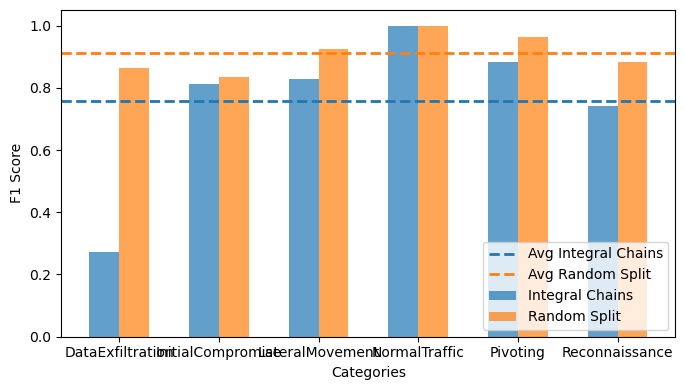

In [33]:
import matplotlib.pyplot as plt

categories = y_test.columns
# Usunięcie przedrostka 'Label_' z nazw kategorii
labels = [cat.replace('Label_', '') for cat in categories]
f1_scores_user = [category_f1_scores_user_defined[cat] for cat in categories]
f1_scores_rand = [category_f1_scores_random[cat] for cat in categories]

bar_width = 0.30
index = range(len(categories))

plt.figure(figsize=(7, 4))
plt.style.use('default')

# Użycie podstawowych kolorów z palety cmap10
bar1 = plt.bar(index, f1_scores_user, bar_width, label="Integral Chains", color='#1f77b4', alpha=0.7)
bar2 = plt.bar([i+bar_width for i in index], f1_scores_rand, bar_width, label="Random Split", color='#ff7f0e', alpha=0.7)

# Grubsze linie dla średnich wyników
plt.axhline(y=mean_f1_score_user_defined, color='#1f77b4', linestyle='dashed', linewidth=2, label="Avg Integral Chains")
plt.axhline(y=mean_f1_score_random, color='#ff7f0e', linestyle='dashed', linewidth=2, label="Avg Random Split")

plt.xlabel('Categories')
plt.ylabel('F1 Score')
#plt.title('Comparison of F1 Score for User Defined Split vs. Random Split')
plt.xticks([i+bar_width/2 for i in index], labels)
plt.legend(loc='lower right')  # Przesunięcie legendy do lewego górnego rogu


plt.tight_layout()
plt.show()


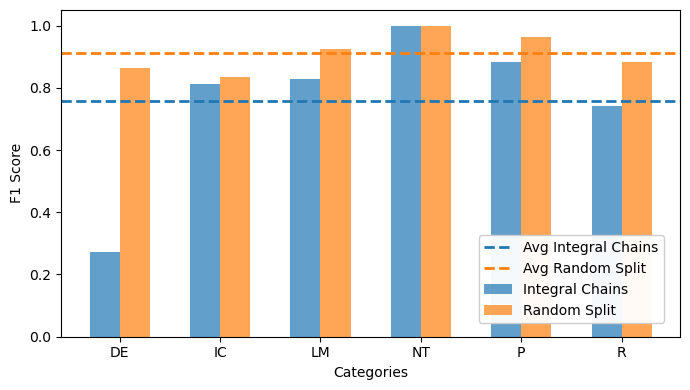

In [51]:
import matplotlib.pyplot as plt

# Usunięcie przedrostka 'Label_' z nazw kategorii
shortened_categories = [cat.replace('Label_', '') for cat in categories]
# Konwersja nazw kategorii na wielkie litery w nich występujące
labels = [''.join([letter for letter in cat if letter.isupper()]) for cat in shortened_categories]

f1_scores_user = [category_f1_scores_user_defined[cat] for cat in categories]
f1_scores_rand = [category_f1_scores_random[cat] for cat in categories]

bar_width = 0.30
index = range(len(categories))

plt.figure(figsize=(7, 4))
plt.style.use('default')

# Użycie podstawowych kolorów z palety cmap10
bar1 = plt.bar(index, f1_scores_user, bar_width, label="Integral Chains", color='#1f77b4', alpha=0.7)
bar2 = plt.bar([i+bar_width for i in index], f1_scores_rand, bar_width, label="Random Split", color='#ff7f0e', alpha=0.7)

# Grubsze linie dla średnich wyników
plt.axhline(y=mean_f1_score_user_defined, color='#1f77b4', linestyle='dashed', linewidth=2, label="Avg Integral Chains")
plt.axhline(y=mean_f1_score_random, color='#ff7f0e', linestyle='dashed', linewidth=2, label="Avg Random Split")

plt.xlabel('Categories')
plt.ylabel('F1 Score')
#plt.title('Comparison of F1 Score for User Defined Split vs. Random Split')
plt.xticks([i+bar_width/2 for i in index], labels)
plt.legend(loc='lower right', bbox_to_anchor=(0.985, 0.02), framealpha=0.95)



plt.tight_layout()
plt.show()
